### Importing Packages

In [2]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Appending of stopwords
Additional words which does not add value to the analysis has been added into the list of stop words too

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append("product")
stop_words.append('products')
stop_words.append('items')
stop_words.append("item")
stop_words.append("garnier")
stop_words.append("skin")
stop_words.append("micellar")
stop_words.append("hair")
stop_words.append("makeup")
stop_words.append("love")
stop_words.append("water")
stop_words.append("face")
stop_words.append("use")
stop_words.append("thank")
stop_words.append("thanks")
stop_words.append("order")
stop_words.append("eye")
stop_words.append("remover")
stop_words.append("mask")
stop_words.append("foundation")
stop_words.append("purchase")
stop_words.append('lip')
stop_words.append('lipstick')
stop_words.append('buy')
stop_words.append('use')
stop_words.append('delivery')
stop_words.append('mascara')
# stop_words.append('seller')

### Functions for dfferent preprocessing steps

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=['ADJ', 'NOUN','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [5]:
data_file = "Data/all_data_clean_nonsplit.csv"
df = pd.read_csv(data_file)
df = df[df["Platform"] == 'Shopee']
df = df[df["Review_clean"] != "no comments review is an image" ]
df = df[df["Review_clean"] != "no review receive" ]
df = df[df["Review_clean"] != "your review has been hidden due to inappropriate content note hope may remove the coins awarded for this review" ]
print(len(df))
df

2721


,Unnamed: 0,Platform,Brand,Category,Product Name,Price,Reviewer,Review,Review_clean,Product Purchase,Ratings,Date Of Review,Response
0,0,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,zenheng,"delivery was quite fast, and item was on disco...",delivery was quite fast and item was on discou...,NaN,4.0,2020-02-06 23:58:00,no
1,1,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,glennoeestaquio,received item sealed properly.\r\r\r\nquick de...,received item sealed properly quick delivery t...,NaN,5.0,2020-02-06 12:44:00,no
2,2,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,shy2206,yet to try but delivery was prompt and product...,yet to try but delivery was prompt and product...,NaN,5.0,2020-02-06 10:21:00,no
3,3,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,lindamiyalin,"well wrapped, in good condition, super fast ...",well wrapped in good condition super fast deli...,NaN,5.0,2020-01-30 23:01:00,no
4,4,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,kyc385,"well packed, will buy again",well packed will buy again,NaN,5.0,2020-02-01 11:40:00,no
5,5,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,junicaj,well wrap in good condition,well wrap in good condition,NaN,5.0,2020-02-01 23:25:00,no
6,6,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,aciirt,came in good condition. will start using soon....,came in good condition will start using soon t...,NaN,5.0,2020-01-26 22:21:00,no
7,7,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,gm.pub,soothing feel,soothing feel,NaN,5.0,2020-01-30 15:45:00,no
8,8,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,ojmelt,"super fast delivery, received item the followi...",super fast delivery received item the followin...,NaN,5.0,2020-01-24 18:59:00,no
9,9,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,areumam,effective product. fast delivery. received 1 d...,effective product fast delivery received 1 day...,NaN,5.0,2020-01-26 12:42:00,no


In [6]:
data = df.Review_clean.values.tolist()
data_words = list(sent_to_words(data))

#Removing of stopwords
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams      
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['ADJ', 'NOUN'])

2721


C:\Users\User\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


### LDA Model

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


### Getting the optimal number of topics
Applying the LDA model to different number to get the optimal number of topics based on the coherence score

In [8]:
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10000,
                                           passes=200,
                                           alpha=1, 
                                            eta = 0.01,
                                            per_word_topics = True)
    
    coherencemodel = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_model)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()) + " " + str(lda_model.log_perplexity(corpus)))

print(datetime.datetime.now())

2020-03-25 14:42:51.450940


C:\Users\User\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


#Topics: 2 Score: 0.19099281986835479 -6.054381701812625
#Topics: 3 Score: 0.3875071076527388 -6.02191506687853
#Topics: 4 Score: 0.41002174441901695 -6.013485091118377
#Topics: 5 Score: 0.4491877732991549 -6.014763531873831
#Topics: 6 Score: 0.48557125784101046 -6.014880277491465
#Topics: 7 Score: 0.487512910936593 -6.031128137398809
#Topics: 8 Score: 0.5184532137639597 -6.032356822579958
#Topics: 9 Score: 0.5223150297015188 -6.044709310452977
2020-03-25 15:35:49.610800


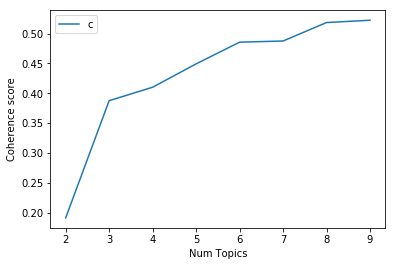

In [9]:
import matplotlib.pyplot as plt

limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('topic_coherence_shopee.png')
plt.show()


### Results obtain by LDA model

In [10]:
lda_model_5topic = model_list[2]
pprint(lda_model_5topic.print_topics(num_words= 15))

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_5topic, corpus, id2word)
vis
# pyLDAvis.save_html(vis, 'lda_4topic_Shopee.html')

[(0,
  '0.119*"free" + 0.086*"day" + 0.058*"time" + 0.058*"gift" + 0.051*"worth" + '
  '0.042*"bottle" + 0.026*"fast" + 0.023*"small" + 0.021*"shipping" + '
  '0.021*"happy" + 0.014*"discount" + 0.014*"promotion" + 0.012*"flash_sale" + '
  '0.011*"concealer" + 0.011*"big"'),
 (1,
  '0.371*"good" + 0.165*"condition" + 0.060*"fast" + 0.047*"great" + '
  '0.027*"packaging" + 0.022*"quality" + 0.022*"value" + 0.020*"service" + '
  '0.016*"money" + 0.010*"smell" + 0.008*"box" + 0.007*"wait" + '
  '0.007*"excellent" + 0.007*"try" + 0.006*"long_lasting"'),
 (2,
  '0.060*"price" + 0.055*"sale" + 0.050*"cheap" + 0.047*"week" + 0.039*"hope" '
  '+ 0.024*"retail" + 0.021*"shade" + 0.019*"store" + 0.018*"package" + '
  '0.014*"work" + 0.014*"mask" + 0.013*"perfect" + 0.013*"little" + '
  '0.012*"packed" + 0.012*"satisfied"'),
 (3,
  '0.093*"seller" + 0.061*"deal" + 0.053*"colour" + 0.050*"nice" + '
  '0.026*"color" + 0.020*"flash" + 0.019*"quick" + 0.017*"bit" + 0.015*"long" '
  '+ 0.015*"bad" + 0

C:\Users\User\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.401022  0.049602       1        1  25.388542
1     -0.239864 -0.018942       2        1  24.998388
3     -0.039780 -0.345061       3        1  24.837074
0     -0.121379  0.314401       4        1  24.775991, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
8     Default  973.000000        good  973.000000  30.0000  30.0000
6     Default  434.000000   condition  434.000000  29.0000  29.0000
60    Default  308.000000        free  308.000000  28.0000  28.0000
9     Default  241.000000      seller  241.000000  27.0000  27.0000
14    Default  223.000000         day  223.000000  26.0000  26.0000
15    Default  158.000000        deal  158.000000  25.0000  25.0000
21    Default  158.000000       price  158.000000  24.0000  24.0000
30    Default  149.000000        gift  149.000000  23.0000  23.0000
70    Default  152.000000        time  152.000000  22.0000  22.0000
66    Default  147.000000        sale  147.000000  21.0000  21.0000
392   Default  137.000000      colour  137.000000  20.0000  20.0000
68    Default  133.000000       worth  133.000000  19.0000  19.0000
18    Default  132.000000       cheap  132.000000  18.0000  18.0000
51    Default  129.000000        nice  129.000000  17.0000  17.0000
97    Default  125.000000        week  125.000000  16.0000  16.0000
211   Default  108.000000      bottle  108.000000  15.0000  15.0000
34    Default  104.000000        hope  104.000000  14.0000  14.0000
126   Default  151.000000       great  151.000000  13.0000  13.0000
1     Default  246.000000        fast  246.000000  12.0000  12.0000
52    Default   69.000000   packaging   69.000000  11.0000  11.0000
397   Default   66.000000       color   66.000000  10.0000  10.0000
20    Default   65.000000      retail   65.000000   9.0000   9.0000
248   Default   60.000000       small   60.000000   8.0000   8.0000
31    Default   57.000000     quality   57.000000   7.0000   7.0000
161   Default   56.000000       value   56.000000   6.0000   6.0000
436   Default   57.000000       shade   57.000000   5.0000   5.0000
158   Default   54.000000    shipping   54.000000   4.0000   4.0000
19    Default   53.000000       happy   53.000000   3.0000   3.0000
98    Default   53.000000       flash   53.000000   2.0000   2.0000
10    Default   52.000000     service   52.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
211    Topic4  108.236824      bottle  108.277260   1.3949  -3.1796
248    Topic4   60.703880       small   60.733631   1.3948  -3.7579
158    Topic4   54.634506    shipping   54.664257   1.3948  -3.8633
19     Topic4   53.622112       happy   53.652634   1.3947  -3.8820
141    Topic4   35.413883   promotion   35.444572   1.3944  -4.2968
16     Topic4   31.368565  flash_sale   31.398314   1.3943  -4.4181
757    Topic4   29.345434   concealer   29.375185   1.3943  -4.4848
5      Topic4   26.310747      prompt   26.340496   1.3942  -4.5939
3      Topic4   26.310747      expiry   26.340496   1.3942  -4.5939
169    Topic4   25.299185        much   25.328934   1.3941  -4.6332
1089   Topic4   23.275948        pump   23.305796   1.3940  -4.7165
216    Topic4   29.334341         big   29.374617   1.3939  -4.4852
135    Topic4   21.252935      second   21.282684   1.3939  -4.8074
235    Topic4   21.252937      sample   21.282686   1.3939  -4.8074
182    Topic4   20.241371      lorean   20.271120   1.3938  -4.8562
569    Topic4   17.206682        size   17.236431   1.3936  -5.0186
136    Topic4   16.195122        able   16.224871   1.3935  -5.0792
413    Topic4   15.183558    suitable   15.213307   1.3933  -5.1437
415    Topic4   15.183558      future   15.213307   1.3933  -5.1437
486    Topic4   15.183558     amazing   15.213307   1.3933  -5.1437
215    Topic4   14.171996    

### Get the dominant topic for each of the review

Look at the reviews and its respective dominant topic given by the LDA model to understand how the lda model classifiy the reviews and to better understand the topics and keyword generated by the lda model. After understanding this, we can better give a name/label to the topics generated

In [17]:
bow = [id2word.doc2bow(line) for line in texts] # get the bow-format lines with the set dictionary

review = []
topic = []
percentage = []
for line,bag in zip(data,bow):
    doc_topics = [(topic, prob) for topic,prob in lda_model_5topic.get_document_topics(bag)]
    doc_topics = sorted(doc_topics, key=lambda x: (x[1]), reverse=True)
#     print(doc_topics)
    dominant_topic = doc_topics[0][0]
    percen = doc_topics[0][1]
    review.append(line)
    topic.append(dominant_topic)
    percentage.append(percen)


keyword = []
for i in range(len(topic)):
    wp = lda_model_5topic.show_topic(topic[i])
    topic_keywords = ", ".join([word for word, prop in wp])
    keyword.append(topic_keywords)
    
df_topic = {'review': review,'keyword': keyword, "topic": topic, "percentage": percentage}
new_df = pd.DataFrame.from_dict(df_topic)


new_df.to_csv('4topic_shopee.csv')
new_df

,review,keyword,topic,percentage
0,delivery was quite fast and item was on discou...,"fast, price, time, deal, sale, worth, cheap, r...",1,0.500000
1,received item sealed properly quick delivery t...,"seller, day, week, hope, qualiti, valu, ship, ...",0,0.400000
2,yet to try but delivery was prompt and product...,"fast, price, time, deal, sale, worth, cheap, r...",1,0.571429
3,well wrapped in good condition super fast deli...,"free, great, gift, colour, bottl, small, servi...",3,0.333350
4,well packed will buy again,"seller, day, week, hope, qualiti, valu, ship, ...",0,0.250000
5,well wrap in good condition,"good, condit, packag, nice, envelop, perfect, ...",2,0.499611
6,came in good condition will start using soon t...,"good, condit, packag, nice, envelop, perfect, ...",2,0.499611
7,soothing feel,"good, condit, packag, nice, envelop, perfect, ...",2,0.400000
8,super fast delivery received item the followin...,"seller, day, week, hope, qualiti, valu, ship, ...",0,0.457101
9,effective product fast delivery received 1 day...,"seller, day, week, hope, qualiti, valu, ship, ...",0,0.398495
